### KNN Classification on Iris Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
df_iris = sns.load_dataset("iris")

In [3]:
df_iris.shape

(150, 5)

In [4]:
type(df_iris)

pandas.core.frame.DataFrame

In [5]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df_iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


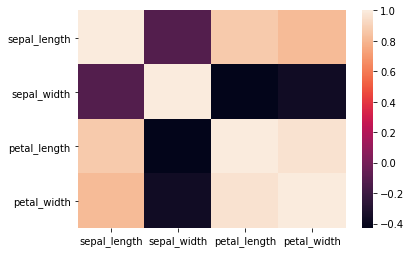

In [8]:
sns.heatmap(df_iris.corr())

we can see that there are correlations in variables

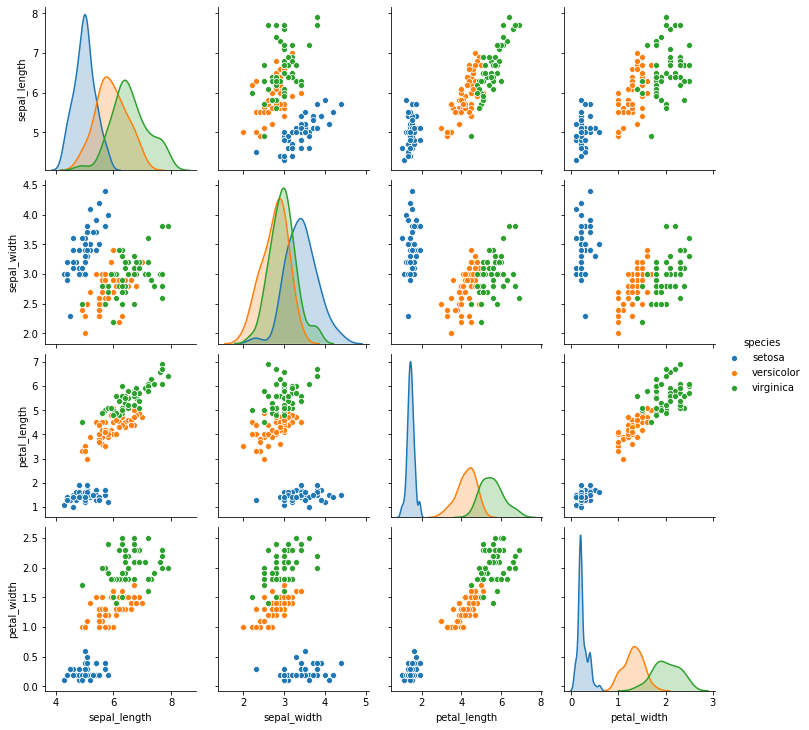

In [9]:
sns.pairplot(df_iris,hue="species")

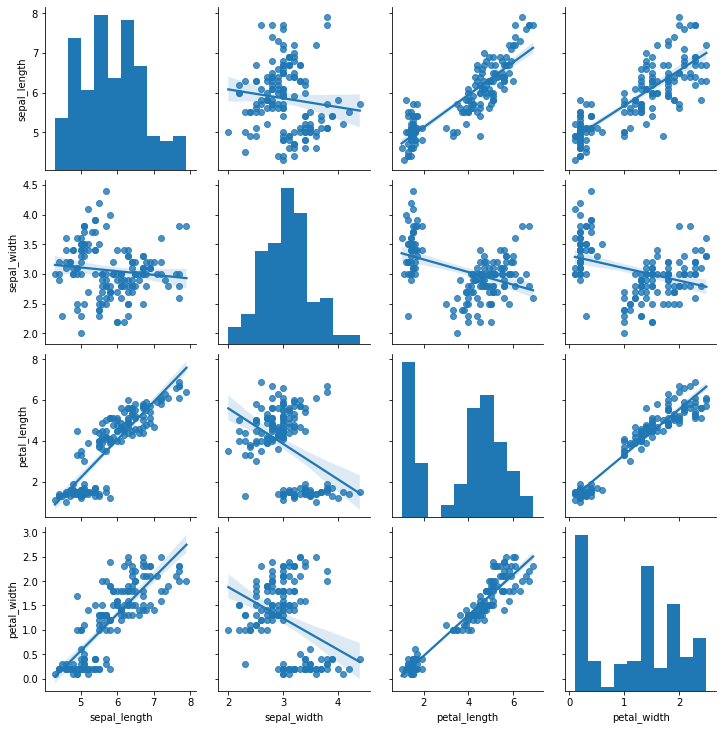

In [10]:
sns.pairplot(df_iris,kind="reg")

In [11]:
##lets check the data distribution to check the scalling requirement
col_name = list(df_iris)
col_name

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [12]:
## drop the target column "species"
X_col_name = col_name
X_col_name.remove("species")
X_col_name

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

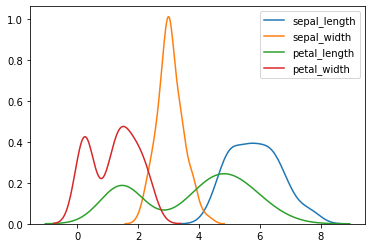

In [13]:
var = []
for var in X_col_name:
    sns.kdeplot(df_iris[var])

we can observer that data is not scale properly so we have to scale the data.

In [14]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
## As we can see that "species" is a categorical variable so we have to do dummy coding to covert this in num
#df_iris["species"] = pd.Categorical(df_iris["species"]).codes

In [17]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [18]:
df_iris["species"].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
## Another way to convert categorical to numerical
## As we can see that "species" is a categorical variable so we have to do dummy coding to covert this in num
enc = LabelEncoder()

In [22]:
df_iris["species"] = enc.fit_transform(df_iris["species"])

In [23]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
df_iris["species"].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

In [25]:
y = df_iris["species"]

In [26]:
X = df_iris.drop("species",axis= 1)

In [27]:
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(150, 4)
(150,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [28]:
### Now do train test split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [29]:
print(X_train.shape)
print(y_train.shape)
print(type(X_train))
print(type(y_train))

(105, 4)
(105,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [30]:
print(X_test.shape)
print(y_test.shape)
print(type(X_test))
print(type(y_test))

(45, 4)
(45,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [31]:
## Build the model
knn = KNeighborsClassifier()

In [32]:
knn_fit = knn.fit(X_train,y_train)

In [33]:
y_pred = knn_fit.predict(X_test)

In [34]:
accuracy_iris_train = metrics.accuracy_score(y_test,y_pred)
print("accuracy_score_iris: ", accuracy_iris_train)

accuracy_score_iris:  0.9777777777777777


In [35]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



In [36]:
iris_conf= metrics.confusion_matrix(y_test,y_pred)
print(iris_conf)

[[14  0  0]
 [ 0 18  0]
 [ 0  1 12]]


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d8228f2408>)

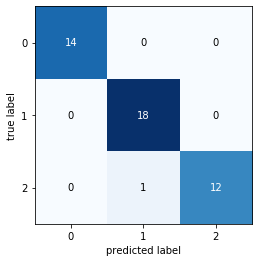

In [37]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=iris_conf)

### Lets scale the data


In [38]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [39]:
X_new = df_iris.drop("species",axis=1)

In [40]:
y_new = df_iris["species"]

In [41]:
scale = StandardScaler()
X_new_scale = scale.fit_transform(X_new)

In [42]:
col_name

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [43]:
df_new_scale = pd.DataFrame(X_new_scale,columns=col_name)

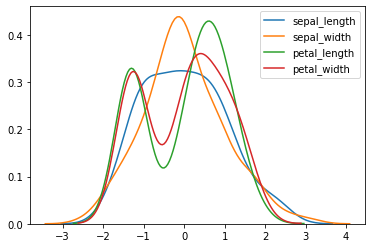

In [44]:
var = []
for var in col_name:
    sns.kdeplot(df_new_scale[var])

In [45]:
df_new_scale.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-9.695948e-16,-8.652338e-16,-4.662937e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


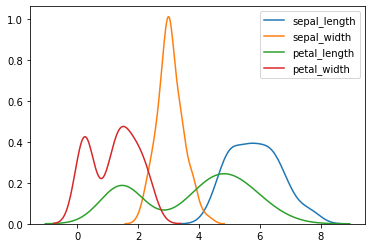

In [46]:
var = []
for var in col_name:
    sns.kdeplot(df_iris[var])

In [47]:
X_new_train,X_new_test,y_new_train,y_new_test = train_test_split(X_new,y_new,test_size = 0.3, random_state = 1)

In [48]:
knn_classifier = KNeighborsClassifier()

In [49]:
knn_classifier.fit(X_new_train,y_new_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [50]:
y_new_pred = knn_classifier.predict(X_new_test)

In [51]:
accuracy_score_scale = metrics.accuracy_score(y_new_test,y_new_pred)
accuracy_score_scale

0.9777777777777777

We can see there is no nay difference in accuracy using scaling the data,

### Corss validation score and Grid search CV

In [52]:
from sklearn.model_selection import GridSearchCV,cross_val_score

In [53]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [54]:
col_name

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [55]:
X_gcv = df_iris.drop("species",axis=1)
X_gcv.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [56]:
y_gcv = df_iris["species"]
y_gcv

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [57]:
## We first consider a model with only the default parameters
Classifier_knn = KNeighborsClassifier()

In [58]:
cross_val_score(Classifier_knn,X_gcv,y_gcv,cv=5)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [59]:
### We now use a grid search to find the optimal.
select_param = {"n_neighbors" : range(1,11),"weights":["uniform","distance"],"metric":["euclidean", "manhattan", "chebyshev", "minkowski"]}

In [60]:
Classifier_knn_gcv = KNeighborsClassifier()

In [61]:
Grid_CV = GridSearchCV(Classifier_knn_gcv,select_param,cv=5) 

In [62]:
Grid_CV.fit(X_gcv,y_gcv)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': range(1, 11),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [63]:
Grid_CV.best_score_

0.9866666666666667

In [64]:
Grid_CV.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

In [65]:
Grid_CV.best_params_

{'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}